# Infinity War Sentiment Analysis

## Marvel Studios' Avengers Infinity War is the combination of the last 10 years of movies that the studio has created. Many people are looking forward to this movie for year. 

## I am curious how the movie is being recieved. I ran a python scrypt to scrape tweets on Thursday the 26th of April right before the movie was release in Manhattan. I want to see if the tweets before the movie are positive and if people think the 10 year build up is worth it with Sentiment analysis of the tweets. 

In [ ]:
from IPython.display import Image
Image("data\Avengers_Infinity_War_Logo.png")

### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

#### Wyatt Prall

In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
import csv
import pandas as pd
from collections import Counter
# The Packages required to run the Jupiter Notebook
import numpy
from os import path
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.pyplot as plt
% matplotlib inline
import requests
from lxml import html
from pattern.en import sentiment

C:\Users\Wyatt Prall\Anaconda2\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import json
 
with open('data/Infinity_war_tweets.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    print(json.dumps(tweet, indent=4)) 
    
# the original data from Twitter looks like below.

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "RT @MarvelStudios: It\u2019s all been leading to this. @Avengers: #InfinityWar is in theaters TONIGHT. Get tickets now: https://t.co/xQsJemiGws\u2026", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 989567202306256896, 
    "favorite_count": 0, 
    "entities": {
        "user_mentions": [
            {
                "id": 750751206427860992, 
                "indices": [
                    3, 
                    17
                ], 
                "id_str": "750751206427860992", 
                "screen_name": "MarvelStudios", 
                "name": "Marvel Studios"
            }, 
            {
                "id": 393852070, 
                "indices": [
                    50, 
                    59
                ], 
                "id_str": "393852070", 
                "screen_name": "Avengers", 
                "name": "The

In [4]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/Infinity_war_tweets.json'):
    try:
        data.append(json.loads(line))
    except:
        pass



# Basic Twitter Information

## Tweet statistics

In [5]:
# How many Tweets are there?
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)   

8189

In [6]:
# read first five tweets only 
for i in data[:5]:
    print i['text']

RT @MarvelStudios: It’s all been leading to this. @Avengers: #InfinityWar is in theaters TONIGHT. Get tickets now: https://t.co/xQsJemiGws…
RT @greenkhan001: Hi
This is my #new #Business #card #Design.If you like it

Contact : https://t.co/RAnuUhtByg 

#بايرن_مدريد #InfinityWar…
RT @GameStop: That moment you remember #InfinityWar starts tonight... https://t.co/gapma3ZEPJ
RT @ColbyCovMMA: Gamora, Loki &amp; Vison die. Spiderman turns to dust in Iron Man's arms. Dr Strange, Black Panther, Star Lord, Bucky, Drax &amp;…
@Niis0207 Esta Hermoso❤ #SpiderMan 
#InfinityWar


### As you can see that there is a total of 8189 tweets but some of them are not in English. Let us discover how many tweets are in English. 

In [9]:
# How many Languages are there
lang = [T['user']['lang'] for T in tweets if 'user' in T]

c = Counter(lang)
print c  

Counter({u'en': 5272, u'es': 1256, u'th': 404, u'pt': 302, u'fr': 279, u'it': 132, u'de': 128, u'pl': 75, u'en-gb': 61, u'ja': 45, u'ru': 38, u'hu': 29, u'tr': 28, u'en-GB': 26, u'ko': 23, u'id': 16, u'nl': 11, u'cs': 8, u'el': 7, u'sv': 6, u'ar': 5, u'da': 5, u'he': 5, u'uk': 4, u'zh-tw': 3, u'xx-lc': 3, u'fi': 3, u'zh-TW': 3, u'ca': 2, u'bg': 2, u'hr': 2, u'es-MX': 2, u'no': 1, u'ro': 1, u'fa': 1, u'sk': 1})


In [10]:
# only English tweets 
english = []
for i in tweets:
    if i['user']['lang'] == "en":
        english.append(i)
len(english), "English Tweets"

(5272, 'English Tweets')

### Only 5272 tweets that are in English

## How many tweets are Original (NOT RETWEETED)

In [54]:
# Saving all of the tweets 
texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

8189

In [55]:
#remove retweets

originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets), "Origial Tweets"

(2438, 'Origial Tweets')

## How Many Tweets are Retweets?

In [56]:
#Viewing only Retweets
retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only), "Retweets"

(5751, 'Retweets')

## The Total of Tweets Orginal Tweets and Retweets

In [57]:
# lets see how many tweets
print len(data) ,"tweets"
print len(originaltweets), "Original tweets"
print len(retweets_only), "Retweets"

8189 tweets
2438 Original tweets
5751 Retweets


### I find this pretty crazy that for less than an hour of twitter scrapeing 8189 tweets were recieved.

# Tweet hashtags

## The # used for the data collection was #infinitywar and as is expected majority of the hashtags are this

In [58]:
hashtags = []

for tweet in texts[:25]:
    print re.findall(r"(?<=#)\w+", tweet)


[u'InfinityWar']
[u'new', u'Business', u'card', u'Design', u'InfinityWar']
[u'InfinityWar']
[]
[u'SpiderMan', u'InfinityWar']
[u'BlackPanther', u'Thanos', u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar', u'InfinityWarTH']
[u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar']
[]
[u'InfinityWar']
[]
[u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar']
[u'NFLDraft2018', u'ThursdayThoughts', u'InfinityWar', u'NationalPretzelDay', u'NFLDraft18', u'AvengersInfinityWars', u'Ne']
[u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar']
[u'InfinityWar']
[u'Business', u'card', u'Design', u'like', u'InfinityWar']
[]


### As you can see the second line, line 19, and line 24 is a little stange 
### While the others only have to do with the movie 

In [59]:
# for 5,000 tweets we will check out how # there are 
for tweet in texts[:5000]:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
         hashtags.append(['#'+i])
       

In [60]:
 # Printing the first 15 hasahtags to appear in texts
for i in hashtags[:15]:
    print i

[u'#InfinityWar']
[u'#new']
[u'#Business']
[u'#card']
[u'#Design']
[u'#InfinityWar']
[u'#InfinityWar']
[u'#SpiderMan']
[u'#InfinityWar']
[u'#BlackPanther']
[u'#Thanos']
[u'#InfinityWar']
[u'#InfinityWar']
[u'#InfinityWar']
[u'#InfinityWar']


In [61]:
#compute frequency distribution for all the hashtags in the tweets

#convert lists to strings
hashtags_string = str(hashtags)

#lowercase
hashtags_string = hashtags_string.lower()

#tokenize
hashtags_string = hashtags_string.split()

fdist = nltk.FreqDist(hashtags_string)

fdist.most_common(15)
# Top 15 Most Popular Hashtags

[("[u'#infinitywar'],", 3965),
 ("[u'#avengers'],", 401),
 ("[u'#infinitywarth'],", 259),
 ("[u'#avengersinfinitywar'],", 144),
 ("[u'#ironman'],", 79),
 ("[u'#thor'],", 69),
 ("[u'#thanos'],", 59),
 ("[u'#guerrainfinita'],", 54),
 ("[u'#joshbrolin'],", 53),
 ("[u'#marvel'],", 53),
 ("[u'#avengersinfinitywars'],", 52),
 ("[u'#thanosdemandsyoursilence'],", 49),
 ("[u'#solounidospodr'],", 48),
 ("[u'#doctorstrange'],", 44),
 ("[u'#sebastianstan'],", 43)]

### All of these hashtags have to do with Infinity war with some being actors some being heroes and others are in spanish.

# Tweets per user

In [62]:
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets), "Total tweets"     

8189

In [63]:
# How many Screen names are there in the tweets
screen_names = [T['user']['screen_name'] for T in tweets]
len(screen_names)

8189

In [64]:
# How many unique users?
c = Counter(screen_names)

len(c), "Unique users"

(6789, 'Unique users')

In [65]:
# five most active tweeters
c.most_common(5)

[(u'RobTamash', 46),
 (u'bernadett_bocsi', 25),
 (u'angeloluis27', 23),
 (u'greenkhan001', 20),
 (u'TKComedy2013', 20)]

## RobTamash is a spanish user that talks about the movie
## Bernadett_bosci is talking about the movie
## angeloluis27 is talking about the movie
## TKComedy2013 is talking about the movie


## What i find interesting is that Greenkhan001 is not talking about the movie instead he is using that hashtag to promote his graphic desgign business. He also has many different hashtags to get the word out. 

In [66]:
# putting the top 5 users into a dataframe
activetweeters = c.most_common(5)
activetweeters_df = pd.DataFrame(activetweeters)
activetweeters_df

,0,1
0,RobTamash,46
1,bernadett_bocsi,25
2,angeloluis27,23
3,greenkhan001,20
4,TKComedy2013,20


## Who are popularly mentioned by other users?

In [67]:
for tweet in texts[:5]:
    print re.findall(r"(?<=@)\w+", tweet)
    #First 5 mentions in the tweets

[u'MarvelStudios', u'Avengers']
[u'greenkhan001']
[u'GameStop']
[u'ColbyCovMMA']
[u'Niis0207']


In [68]:
for tweet in texts[:5]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print '@'+i
        
        #First 5 mentions in the tweets

@MarvelStudios
@Avengers
@greenkhan001
@GameStop
@ColbyCovMMA
@Niis0207


In [69]:
visible_users = []

for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i])
        #Discovering the visiable users

In [70]:
 #convert lists to strings
visible_users = str(visible_users)

#lowercase
visible_users = visible_users.lower()

#tokenize
visible_users = visible_users.split()

fdist = nltk.FreqDist(visible_users)

fdist.most_common(10)

[("[u'@avengers'],", 1744),
 ("[u'@chadwickboseman'],", 592),
 ("[u'@marvelstudios'],", 575),
 ("[u'@marvel'],", 395),
 ("[u'@jamesgunn'],", 378),
 ("[u'@fieetmac'],", 280),
 ("[u'@chrishemsworth'],", 213),
 ("[u'@doonungvonpai'],", 160),
 ("[u'@taikawaititi'],", 123),
 ("[u'@karengillan'],", 104)]

## Avengers and Chadwickboseman are the top two. Avengers is the name of the team in the movie and Chadwickboseman plays the character Black Panther.

# Who are the top ten mentioned users?

In [71]:
#convert lists to strings
visible_users = str(visible_users)

#lowercase
visible_users = visible_users.lower()

#tokenize
visible_users = visible_users.split()

fdist = nltk.FreqDist(visible_users)

fdist.most_common(10)

[('"[u\'@avengers\'],",', 1744),
 ('"[u\'@chadwickboseman\'],",', 592),
 ('"[u\'@marvelstudios\'],",', 575),
 ('"[u\'@marvel\'],",', 395),
 ('"[u\'@jamesgunn\'],",', 378),
 ('"[u\'@fieetmac\'],",', 280),
 ('"[u\'@chrishemsworth\'],",', 213),
 ('"[u\'@doonungvonpai\'],",', 160),
 ('"[u\'@taikawaititi\'],",', 123),
 ('"[u\'@karengillan\'],",', 104)]

#### Avengers is number one as is expected since the movie is about them and Marvel is number 3 on the list.

# 3 URL METRICS

## A. URL: how many URLs in tweets? How many unique URLs in the dataset? 

In [72]:
for T in tweets[:10]:
    print T['entities']['urls']

[{u'url': u'https://t.co/xQsJemiGws', u'indices': [115, 138], u'expanded_url': u'http://www.fandango.com/infinitywar', u'display_url': u'fandango.com/infinitywar'}]
[{u'url': u'https://t.co/RAnuUhtByg', u'indices': [87, 110], u'expanded_url': u'https://goo.gl/hFCB44', u'display_url': u'goo.gl/hFCB44'}]
[]
[]
[]
[]
[]
[]
[]
[]


In [73]:
urls = []

for T in tweets:
    for i in T['entities']['urls']:
        urls.append(i['url'])
        


In [74]:
len(urls)

2962

In [75]:
unique_word_count = len(set(urls))
print unique_word_count, "Unique URLS"

1492 Unique URLS


## The top URL will take you to the website Fandango. 

# Top URLS

In [76]:
urls
c = Counter(urls)
c.most_common(10)

[(u'https://t.co/xQsJemiGws', 501),
 (u'https://t.co/et9a52O4bk', 280),
 (u'https://t.co/kctg8VkHan', 170),
 (u'https://t.co/4TWA3POmEN', 85),
 (u'https://t.co/UiS1rbqfAk', 68),
 (u'https://t.co/RM7FkOs1XA', 63),
 (u'https://t.co/BA6hpJofaT', 28),
 (u'https://t.co/kwjNUZvkpo', 27),
 (u'https://t.co/65awOtfJig', 22),
 (u'https://t.co/yhRZaQHky5', 22)]

# Sentiment Analysis

In [11]:
english_originaltweets = []

for tweet in english:
    if 'rt @' not in tweet['text'].lower():
        english_originaltweets.append(tweet['text'])
        
len(english_originaltweets)

1479

In [12]:
# Remove useless numbers and alphanumerical words including http     
documents = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in english_originaltweets]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
english_originaltweets_clean = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [100]:
for tweet in english_originaltweets_clean:
    score = sentiment(tweet)

In [101]:
positive_reviewsp = []
negative_reviewsp = []
neutral_reviewsp = []

for row in english_originaltweets_clean:
    t = row
    score = sentiment(t)
    if score[0] > 0:
        positive_reviewsp.append(t)
    elif score[0] == 0:
        neutral_reviewsp.append(t)
    else:
        negative_reviewsp.append(t)

In [102]:
p = 'Positive'
N= 'Negative' 
n= 'Neutral'
# These will be used for labeling throughout the tutorial for clarification

In [103]:
print len(positive_reviewsp),p
print len(negative_reviewsp),N
print len(neutral_reviewsp),n
#showing how many reviews in each category

458 Positive
149 Negative
872 Neutral


## Pretty good with 458 positive and only 49 negative. I think the high neutral numbers are due to the fact that peoplehave not seen the movie yet when the tweets were collected.

In [13]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','fuck','fucking','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using']

extra_stoplist = extra_stopwords
english_originaltweets_clean = [[word for word in text if word not in extra_stoplist] for text in english_originaltweets_clean]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

In [14]:
english_originaltweets_clean[:5]

[[u'take', u'infinitywar', u'spoiler', u'ready', u'ever', u'ready'],
 [],
 [u'tempted',
  u'watch',
  u'infinitywar',
  u'even',
  u'though',
  u'havent',
  u'watched',
  u'marvel',
  u'film',
  u'since',
  u'iron',
  u'man',
  u'lost',
  u'focuse'],
 [u'damn', u'cute', u'idk', u'word', u'describe'],
 [u'date', u'night', u'infinitywar']]

In [15]:
english_originaltweets_clean = [x for x in english_originaltweets_clean if x]
english_originaltweets_clean[:5]

[[u'take', u'infinitywar', u'spoiler', u'ready', u'ever', u'ready'],
 [u'tempted',
  u'watch',
  u'infinitywar',
  u'even',
  u'though',
  u'havent',
  u'watched',
  u'marvel',
  u'film',
  u'since',
  u'iron',
  u'man',
  u'lost',
  u'focuse'],
 [u'damn', u'cute', u'idk', u'word', u'describe'],
 [u'date', u'night', u'infinitywar'],
 [u'thanos',
  u'sonofagunart',
  u'infinitywar',
  u'thanos',
  u'marvel',
  u'portraitoftheday',
  u'portraitart',
  u'marvelfanart']]

In [16]:
len(english_originaltweets_clean)

1435

# Mention Network

In [108]:
#putting everything together

import csv

mention = []
for tweet in tweets:
    mention.append([tweet['user']['screen_name']+',', tweet['text']])    
openfile = open("data/mentionnetwork.csv", "wb")

w = csv.writer(openfile)
for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0], '@'+i])
        
openfile.close()

In [ ]:
### @ Marvel Studios
### @ ChadwickBoseman
### @Avengers 
### @ChrisHemsworth
### The top 4 in degree in and the first modularity class
## mention Newtowk is shown in the powerpoint. 

# Co Hashtag Network


In [109]:
datas = []
for i in english_originaltweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", i)
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    datas.append(hashtag)

In [110]:
from itertools import combinations
cohashtags = [x for d in datas for x in combinations(d, 2)]
cohashtags[:10]

[('sonofagunart', 'infinitywar'),
 ('sonofagunart', 'thanos'),
 ('sonofagunart', 'marvel'),
 ('sonofagunart', 'portraitoftheday'),
 ('sonofagunart', 'portraitart'),
 ('sonofagunart', 'marvelfanart'),
 ('infinitywar', 'thanos'),
 ('infinitywar', 'marvel'),
 ('infinitywar', 'portraitoftheday'),
 ('infinitywar', 'portraitart')]

In [ ]:
#Borke up into 40 unique modularities.
# Group 2 made up 28.14% which was mostly about being  for the movie and who people are excited to see
# Group 9 made up 12.93% which was mostly about what actors and characters will appear in the movie
# Group 3  and Grup 10 tied Third with 7.22% 
# Group 3 is reffering to nospoilers for the movie and comics 
# Group 10 is reffering to the tickets and no spoilers. 

## Co hashtags are shown in the powerpoint. 

# Topic Modeling 

In [111]:
#for cohashtag analysis
outfile = open("data/cohashtag_network.csv", "wb")
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

In [17]:
# this is text processing required for topic modeling with Gensim
dictionary = Dictionary(english_originaltweets_clean)
corpus = [dictionary.doc2bow(text) for text in english_originaltweets_clean]

5
10
15


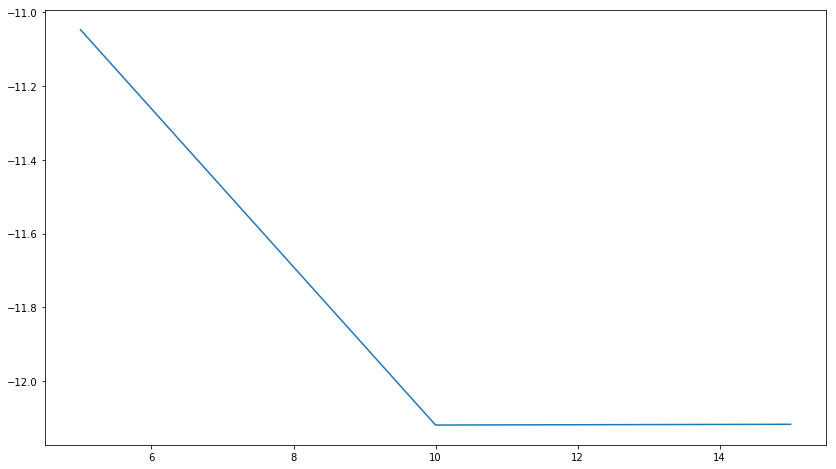

In [115]:
numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(5,20,5)   # This process could take a very long time ...
scores = []
for k in k_range:
    print k            # to figure out where this process is ... 
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=20)  #for better results, use a higher passes (e.g., 50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure(figsize=(14, 8))
plt.plot(k_range, scores)

In [18]:
numpy.random.seed(1) # setting random seed to get the same results each time. For a large dataset, high passes (e.g., 50, 75) would be desirable.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, passes=50)

In [19]:
model.show_topics()

[(0,
  u'0.045*"infinitywar" + 0.035*"guy" + 0.026*"epix" + 0.009*"avenger" + 0.009*"captainamerica" + 0.009*"ironman" + 0.005*"spiderman" + 0.005*"happy" + 0.004*"starlord" + 0.004*"marvel"'),
 (1,
  u'0.084*"infinitywar" + 0.026*"hour" + 0.009*"already" + 0.007*"avenger" + 0.007*"well" + 0.006*"marvel" + 0.006*"die" + 0.005*"ticket" + 0.005*"minute" + 0.005*"saturday"'),
 (2,
  u'0.039*"infinitywar" + 0.011*"movie" + 0.007*"tonight" + 0.007*"spoiler" + 0.006*"mcu" + 0.005*"review" + 0.005*"amazing" + 0.005*"que" + 0.005*"mind" + 0.004*"retweeted"'),
 (3,
  u'0.093*"infinitywar" + 0.032*"tonight" + 0.012*"ready" + 0.011*"wait" + 0.011*"spoiler" + 0.010*"seeing" + 0.009*"avenger" + 0.009*"thanos" + 0.007*"people" + 0.006*"anyone"'),
 (4,
  u'0.116*"infinitywar" + 0.042*"avenger" + 0.033*"war" + 0.033*"infinity" + 0.019*"marvel" + 0.016*"watch" + 0.010*"movie" + 0.009*"thanos" + 0.009*"tomorrow" + 0.008*"tonight"'),
 (5,
  u'0.097*"infinitywar" + 0.019*"avenger" + 0.016*"movie" + 0.016*

# Part 2 Sentiment Analysis comparison to 3 Top marvel Movies.
# Word cloud and Word Frequency in Infinity War Reviews

In [78]:
Testdata = []
a = "https://www.rottentomatoes.com/m/black_panther_2018/reviews/?page="
count =2
b = "&sort="
for i in range (1,8):
    url = '%s%s%s' %(a,count,b)
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    rating = data.xpath("//div[2]/div[1]/text()")
    crawleddata = zip(rating)
    for row in crawleddata:
        Testdata.append(row)
        # Collecting Black Panther Reviews

In [79]:
Testdata = []
a = "https://www.rottentomatoes.com/m/iron_man/reviews/?page="
count =2
b = "&sort="
for i in range (1,8):
    url = '%s%s%s' %(a,count,b)
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    rating = data.xpath("//div[2]/div[1]/text()")
    crawleddata = zip(rating)
    for row in crawleddata:
        Testdata.append(row)
        # Collecting Iron Man Reviews

In [80]:
Testdata = []
a = "https://www.rottentomatoes.com/m/guardians_of_the_galaxy/reviews/?page="
count =2
b = "&sort="
for i in range (1,8):
    url = '%s%s%s' %(a,count,b)
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    rating = data.xpath("//div[2]/div[1]/text()")
    crawleddata = zip(rating)
    for row in crawleddata:
        Testdata.append(row)
        # Collecting Guardians of the Galay Reviews 

In [81]:
IWdata = []
a = "https://www.rottentomatoes.com/m/avengers_infinity_war/reviews/?page="
count =2
b = "&sort="
for i in range (1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 1
    data = html.fromstring(requests.get(url).text)
    rating = data.xpath("//div[2]/div[1]/text()")
    crawleddata = zip(rating)
    for row in crawleddata:
        IWdata.append(row)
        # Collecting Infinity War Reviews

In [82]:
# Used to save the Reviews into a CSV
#finaldatas = pd.DataFrame(Testdata) 
#finaldatas.to_csv("data/MarvelReview.csv", encoding='utf-8')
#finaldatas = pd.DataFrame(IWdata) 
#finaldatas.to_csv("data/IWReview.csv", encoding='utf-8')

In [84]:
review = [] # housing the reviews of the csv file into review
openfile = open('data/MarvelReview.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    review.append(i[0])    
openfile.close()

print review[:1]

[' "Guardians of the Galaxy" relied too much on the audience already knowing the Marvel mythology. Call it, in my opinion, an unacceptable shorthand. ']


In [85]:
iwreview = [] # housing the reviews of the csv file into iwreview
openfile = open('data/IWReview.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    iwreview.append(i[0])    
openfile.close()

print iwreview[:1]

[' "Avengers: Infinity War" is a successful tuneup for a tumultuous, significant chapter in the continuing Marvel Cinematic Universe that will alter the trajectory of the franchise as it enters its second decade.']


In [86]:
for row in review:
    score = sentiment(row)
    print score[0], score[1] 
# Sentiment analysis with Pattern

0.2 0.2
0.136363636364 0.454545454545
0.15 0.475
-0.1 0.391666666667
0.110416666667 0.529166666667
0.328125 0.483333333333
0.0 0.0
0.0 0.0
-0.5625 1.0
0.466666666667 0.5
0.35 0.65
0.368181818182 0.727272727273
0.26 0.44
0.433333333333 0.833333333333
-0.0339285714286 0.361607142857
0.5 0.85
0.160416666667 0.352083333333
0.107142857143 0.598214285714
0.6 0.9
0.566666666667 0.866666666667
0.208333333333 0.583333333333
0.268269230769 0.497863247863
0.416666666667 0.566666666667
0.5 0.7
0.12 0.551666666667
0.516666666667 0.8
0.1375 0.2875
0.476785714286 0.580357142857
0.0 0.4
-0.0625 0.625
0.2 0.40625
0.25 0.2
0.305555555556 0.844444444444
0.0 0.0
0.162121212121 0.586868686869
0.0 1.0
0.218571428571 0.294285714286
0.533333333333 0.65
0.433333333333 0.566666666667
0.214285714286 0.5
0.0 0.0
0.207272727273 0.560909090909
0.6 1.0
0.335714285714 0.742857142857
-0.047619047619 0.557142857143
0.375 0.5
0.222619047619 0.730952380952
0.0 0.0
0.228571428571 0.292857142857
0.3 0.2
0.571428571429 0.45

In [87]:
for row in iwreview:
    score = sentiment(row)
    print score[0], score[1] 

0.28125 0.50625
0.316666666667 0.833333333333
0.0333333333333 0.1
0.375 0.5
0.0 0.1
0.0 0.0
0.05 0.7
-0.155555555556 0.288888888889
0.425 0.675
0.07 0.875
0.07 0.323333333333
0.5 0.972222222222
-0.2 0.2
0.175 0.275
0.225 0.5
0.0 0.0
0.0625 0.6
-0.005 0.53
-0.275 0.55
0.0833333333333 0.462962962963
-0.2 0.2
-0.75 0.75
0.5 0.5
0.0125 0.525
0.175 0.55
0.205357142857 0.535714285714
0.109523809524 0.538095238095
0.0 0.0
0.0 0.0
-0.244444444444 0.422222222222
-0.015873015873 0.534126984127
0.116666666667 0.333333333333
0.325 0.513888888889
0.616666666667 0.708333333333
0.0583333333333 0.533333333333
0.216666666667 0.383333333333
-0.0166666666667 0.45
0.2 0.1
0.0 0.0
0.1425 0.34
0.347727272727 0.629924242424
0.0428571428571 0.438095238095
0.2 0.683333333333
0.05 0.3
0.166666666667 0.166666666667
0.225 0.541666666667
0.744444444444 0.627777777778
0.2 0.55
0.1 0.4
0.2875 0.625
-0.0142857142857 0.614285714286
-0.169642857143 0.419642857143
0.3125 0.4875
0.514285714286 0.607142857143
0.2666666666

In [88]:
positive_reviewsp = []
negative_reviewsp = []
neutral_reviewsp = []

for row in review:
    t = row
    score = sentiment(t)
    if score[0] > 0:
        positive_reviewsp.append(t)
    elif score[0] == 0:
        neutral_reviewsp.append(t)
    else:
        negative_reviewsp.append(t)

In [89]:
print len(positive_reviewsp),"Positive","Marvel Movies"
print len(negative_reviewsp),"Negative", "Marvel Movies"
print len(neutral_reviewsp),"Neutral","Marvel Movies"

106 Positive Marvel Movies
21 Negative Marvel Movies
13 Neutral Marvel Movies


In [90]:
positive_reviewsiw = []
negative_reviewsiw = []
neutral_reviewsiw= []

for row in iwreview:
    t = row
    score = sentiment(t)
    if score[0] > 0:
        positive_reviewsiw.append(t)
    elif score[0] == 0:
        neutral_reviewsiw.append(t)
    else:
        negative_reviewsiw.append(t)
# putting the sentiments into review categories

In [91]:
print len(positive_reviewsiw),"Positive" ,"Infinity War"
print len(negative_reviewsiw),"Negative","Infinity War"
print len(neutral_reviewsiw),"Neutral","Infinity War"

128 Positive Infinity War
34 Negative Infinity War
18 Neutral Infinity War


## As you can see the reviews seem to be about the same sentiment. This to me that Infinity War is a good movie like the previously selected movies but not a cinematic masterpiece that some claim it to be. 

# Word frequency and Word Cloud 

In [93]:
# what if you have additional stopwords to be removed
tokens = str(IWdata)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('report', 'permalink', 'ago','hour','year','abuse','yesterday','also','thing','get','like','see'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)

fdist = nltk.FreqDist(tokens)
fdist.most_common(50)

[('2018', 180),
 ('april', 172),
 ('war', 70),
 ('infinity', 67),
 ('27', 53),
 ('26', 48),
 ('movie', 47),
 ('25', 44),
 ('marvel', 43),
 (u'second', 31),
 (u'avenger', 30),
 (u'film', 28),
 ('2', 25),
 ('one', 22),
 ('full', 21),
 ('critic', 20),
 ('top', 20),
 ('review', 18),
 ('action', 17),
 ('much', 17),
 ('character', 17),
 (u'ha', 17),
 ('spanish', 16),
 ('universe', 15),
 ('30', 13),
 ('many', 12),
 (u'fan', 11),
 ('even', 11),
 ('story', 11),
 ('cinematic', 11),
 ('epic', 11),
 (u'time', 11),
 ('end', 10),
 ('may', 10),
 ('feel', 10),
 ('part', 10),
 ('yet', 10),
 ('long', 10),
 ('minutes16', 9),
 ('28', 9),
 ('superhero', 9),
 ('minutes30', 9),
 ('4', 9),
 ('know', 9),
 ('minutes24', 9),
 ('two', 8),
 ('1', 8),
 ('good', 8),
 ('blockbuster', 8),
 ('mcu', 8)]

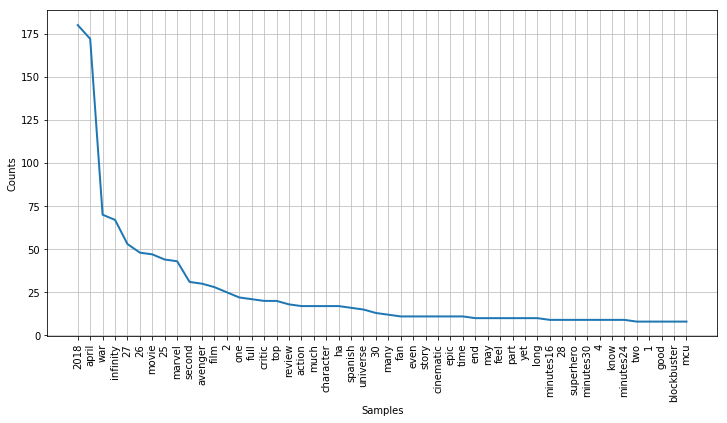

In [94]:
plt.figure(figsize=(12,6))
fdist.plot(50)

## The top used words are the date for the review and Infinity War. 

In [95]:
# what if you have additional stopwords to be removed
tokens = str(IWdata)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(50)

[(('infinity', 'war'), 66),
 ((u'avenger', 'infinity'), 25),
 (('critic', 'april'), 18),
 (('top', 'critic'), 18),
 ((u'second', u'second'), 18),
 (('april', 'infinity'), 17),
 (('review', 'spanish'), 16),
 (('full', 'review'), 16),
 (('april', u'avenger'), 14),
 (('spanish', 'april'), 12),
 (('marvel', u'movie'), 11),
 ((u'second', 'april'), 8),
 (('cinematic', 'universe'), 7),
 (('marvel', 'cinematic'), 6),
 (('comic', 'book'), 6),
 (('april', 'movie'), 6),
 (('april', 'film'), 5),
 ((u'movie', 'april'), 5),
 (('april', 'much'), 5),
 (('april', 'marvel'), 4),
 (('marvel', u'studio'), 3),
 (('superhero', 'movie'), 3),
 (('april', 'thanos'), 3),
 (('many', u'character'), 3),
 (('april', 'lot'), 3),
 (('war', 'pretty'), 3),
 (('first', 'time'), 2),
 (('anyone', 'care'), 2),
 (('april', 'know'), 2),
 (('war', 'one'), 2),
 (('april', 'massive'), 2),
 (('relentless', 'action'), 2),
 (('april', u'fan'), 2),
 (('spectacle', 'april'), 2),
 (('april', 'epic'), 2),
 (('character', u'moment'), 2

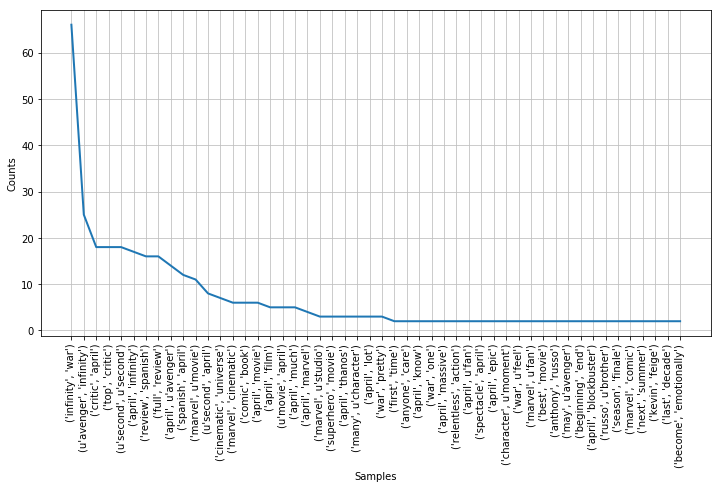

In [96]:
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

## Top used Bigrams are of course The tile Infinity War and Avengers Infinity. 

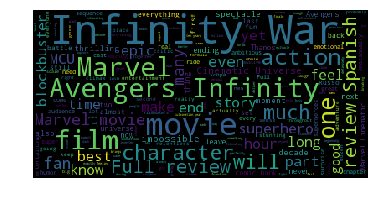

In [97]:
from os import path
text = open(path.join('data/IWReview.csv')).read()
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()

## All in all Infinity war seems to be a great addition to the Marvel Cinematic Univers. But the 10 year build up seems to not really show with the sentiment analysis. However, this movie is a success generating over 1 billion dollars and that is still growing. In conclusion I think that this movie was good but perhaps another good standalone superhero movie could have had the same review scores and audience reception. Just recently the Marvel movie Black Panther was released and is the highest scored Marvel movie on Rotten Tomatoes. If Disney and Marvel are looking for good audience reception infinity war does that, but it isnt the greatest movie that Marvel has ever released. 